In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing library function


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

#1. Load the csv file

In [5]:
df= pd.read_csv('/content/drive/MyDrive/EWU Couses/CSE303  Practice-20251121T155013Z-1-001/CSE303  Practice/Fall 2025/Lab 7  Logistic Regression/Lab 7 task/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#2. Display the first and last 5 rows of the dataset.

In [ ]:
# The first 5 Rows.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# The last 5 rows.
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#3.Check for any missing (null) values in the dataset

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#4. Display the Correlation Matrix.

In [ ]:
#calculating the correlation.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Renaming the 'DiabetesPedigreeFunction' column as "DPF"
df.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


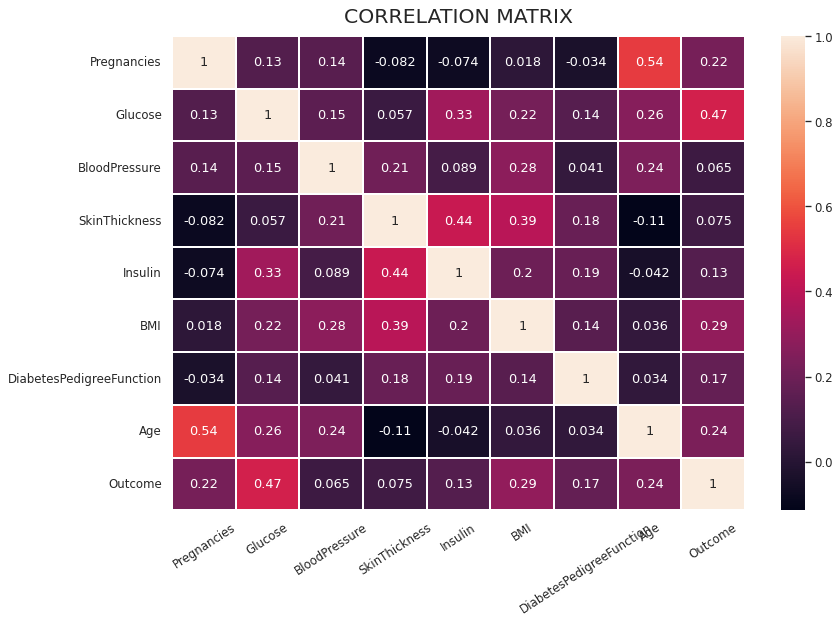

In [ ]:
# Displaying the correlation.
plt.figure(figsize=(12, 8), dpi=77)
sns.heatmap(df.corr(), linecolor='white', linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(),size=19, pad=13)
plt.xticks(rotation=33)
plt.show()

# Anothter part of Questioin 4:Show all kind of plots( i.e: scatter plot, line plot , barplot, pie chart, histogram, boxplot, count plot) that might convey some information and write what you understood from the graphs.

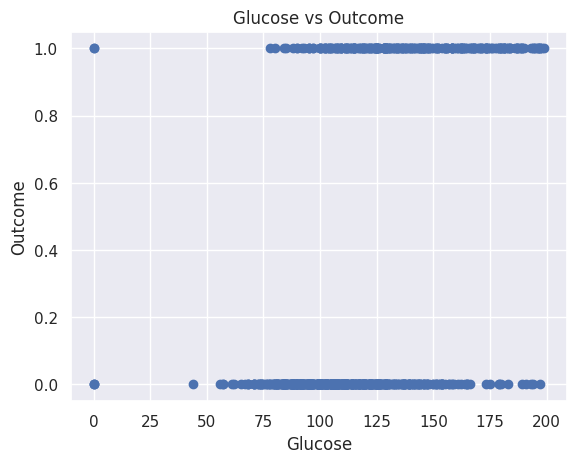

In [9]:
df_2 = df.copy()
x = df_2['Glucose']
y = df_2['Outcome']
plt.scatter(x,y)
plt.title("Glucose vs Outcome")
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.show()

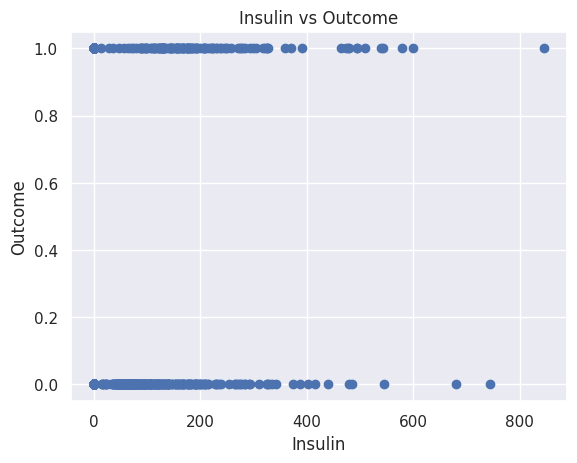

In [10]:
df_2 = df.copy()
x = df_2['Insulin']
y = df_2['Outcome']
plt.scatter(x,y)
plt.title("Insulin vs Outcome")
plt.xlabel("Insulin")
plt.ylabel("Outcome")
plt.show()


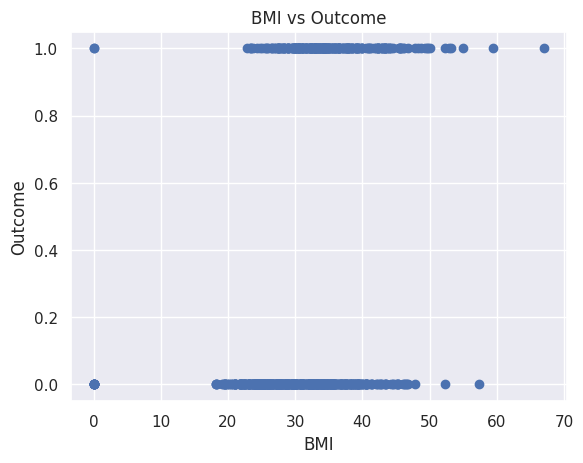

In [11]:
df_2 = df.copy()
x = df_2['BMI']
y = df_2['Outcome']
plt.scatter(x,y)
plt.title("BMI vs Outcome")
plt.xlabel("BMI")
plt.ylabel("Outcome")
plt.show()

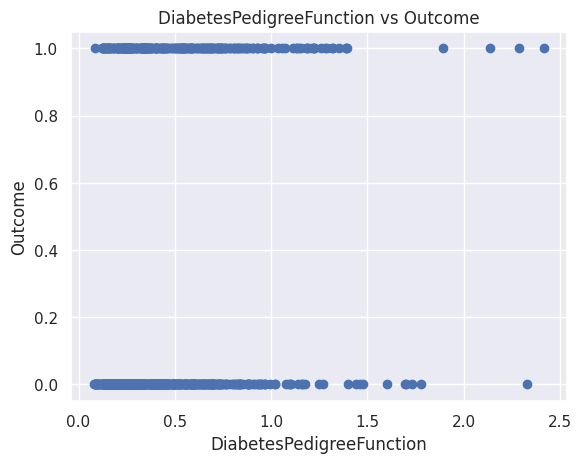

In [12]:
df_2 = df.copy()
x = df_2['DiabetesPedigreeFunction']
y = df_2['Outcome']
plt.scatter(x,y)
plt.title("DiabetesPedigreeFunction vs Outcome")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Outcome")
plt.show()

Text(0, 0.5, 'Outcome')

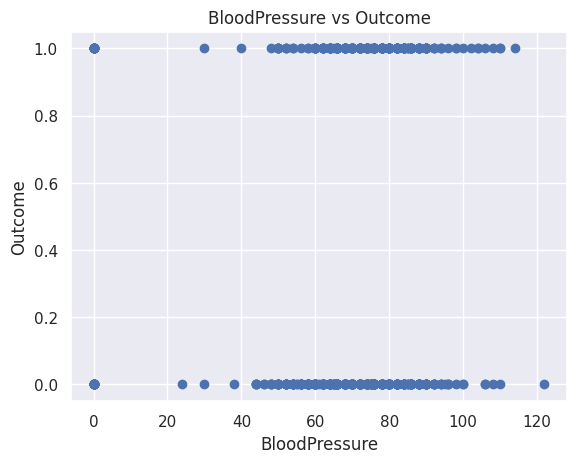

In [13]:
df_2 = df.copy()
x = df_2['BloodPressure']
y = df_2['Outcome']
plt.scatter(x,y)
plt.title("BloodPressure vs Outcome")
plt.xlabel("BloodPressure")
plt.ylabel("Outcome")

#5. Finally ,based on the processed data, run a machine learning model and predict outcome and display both the accuracy and confusion matrix for evaluation.

In [14]:
x = df_2.drop('Outcome', axis=1)
y = df_2['Outcome']

In [15]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# Now Running the matching model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#Predicting the outcome.
y_pred = model.predict(x_test)
print("Predicted labels",y_pred)

Predicted labels [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


Accuracy: 0.7792207792207793
Precision: 0.6933333333333334
Recall: 0.65
f1_score: 0.6709677419354839


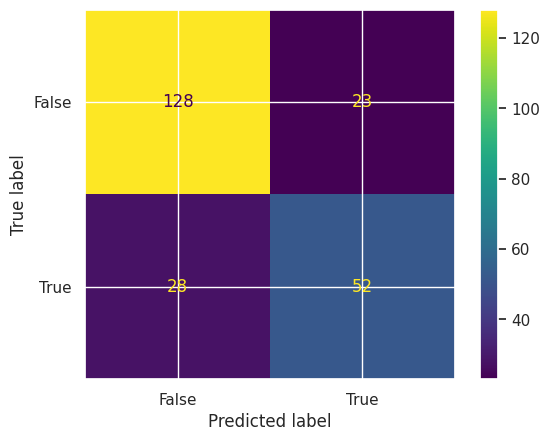

In [31]:
# Bothe accuracy and confusion matrix.

# accuracy calculation.
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

#precision calculation.
precision = precision_score(y_test, y_pred)
print("Precision:",precision)

#re-call calculation.
recall = recall_score(y_test,y_pred)
print("Recall:",recall)

# F1-score.
f1 = f1_score(y_test, y_pred)
print("f1_score:",f1)


from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()